In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
folder = "../../runs/train/lyrurus_yolo"

In [3]:
model = ["v8m,v11l,v11m"]
model = "v8m"

In [4]:
#Get res of the training
res = pd.read_csv(folder + model + "/results.csv")

In [5]:
w_box_loss = 7.5
w_cls_loss = 0.5
w_dfl_loss = 1.5

res["train/total_loss"] = (
    w_box_loss * res["train/box_loss"] +
    w_cls_loss * res["train/cls_loss"] +
    w_dfl_loss * res["train/dfl_loss"]
)

res["val/total_loss"] = (
    w_box_loss * res["val/box_loss"] +
    w_cls_loss * res["val/cls_loss"] +
    w_dfl_loss * res["val/dfl_loss"]
)

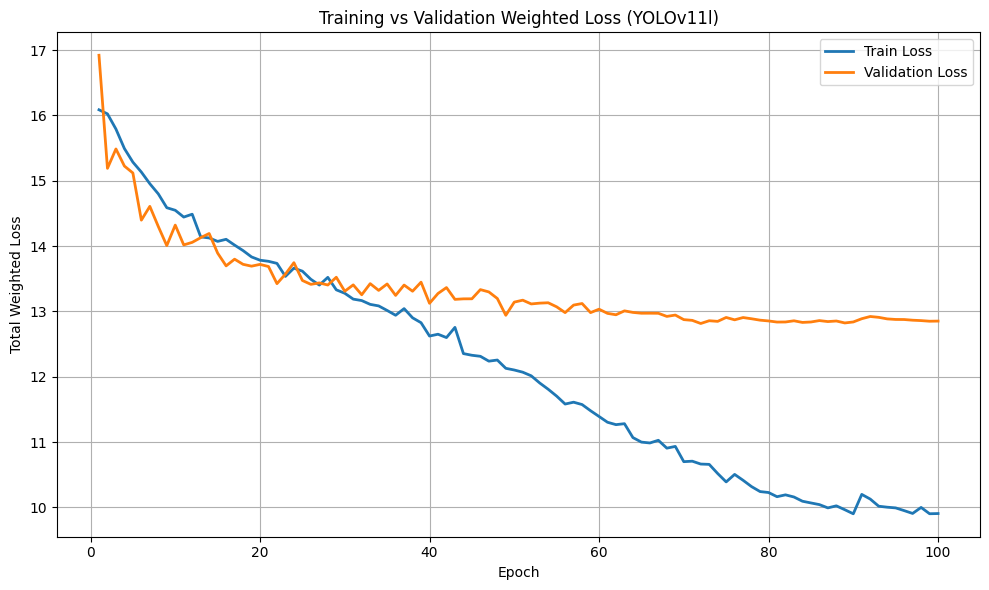

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(res.index + 1, res["train/total_loss"], label="Train Loss", linewidth=2)
plt.plot(res.index + 1, res["val/total_loss"], label="Validation Loss", linewidth=2)

plt.xlabel("Epoch")
plt.ylabel("Total Weighted Loss")
plt.title("Training vs Validation Weighted Loss (YOLOv11l)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()